## GR5260 Programming

### 1.21 Class1 

In [95]:
x = 1.3
y = 10
x, y = 1.3, 20
x*y

26.0

In [96]:
type (x), type (y), type(x*y)

(float, int, float)

In [97]:
x**2

1.6900000000000002

In [99]:
x= 1.3
x *=2 #in-place arithmetic
x

2.6

In [101]:
z = 'my name is'
w = ' kelly'
z+w

'my name is kelly'

In [102]:
z+ y

TypeError: can only concatenate str (not "int") to str

In [103]:
z + str(y)

'my name is20'

In [104]:
# Data display
v= x/y
print ('value of v is :', v, 'Good')

value of v is : 0.13 Good


In [116]:
# string formatting
s ='value of v is: {0:.1f}'.format(v)
print(s)

value of v is: 0.1


In [117]:
s1 = 'two values: {0:.1f} vs {1:10.2f}'.format(v, v**2)
print (s1)

two values: 0.1 vs       0.02


In [120]:
# string interpolation
s2 = f'two values: {v:.1f} vs{v**2: 10.2f}'
print (s2)

two values: 0.1 vs      0.02


In [121]:
# conditional execution
# if, else, elif
# if v ==0.13:
tol = 1.0e-8
if abs (v -0.13) < tol:
    print ('good')
else:
    print ('something')

good


In [122]:
if v:
    print(v)

0.13


In [123]:
#iterations
for i in range (0,5): # range 是一个loop, i 是integer, 0,1,2,3,4,
    if i == 1:
        continue #skip
    if i > 3:
        break
    print(i)


0
2
3


In [125]:
%load_ext mypy_ipython

In [126]:
# funtion defintion
# type checking
# default value
def multiply (x:float, y:float =10) -> float:
    return x*y
multiply (3,2), multiply (2.1), multiply('a')

(6, 21.0, 'aaaaaaaaaa')

In [127]:
def func(x:float, y:float =10) -> float:
    f = x*3 +x*y-y**2
    return f

In [128]:
# type checks
%mypy

    p.shape, S0 [:3], p[:3]
error: Value of type "int" is not indexable
    S0 = S0.reshape (N,1)
error: "int" has no attribute "reshape"
    v = v.reshape (N,1)
error: "float" has no attribute "reshape"
    t_predict[:3], y_test[:3]
error: Name 't_predict' is not defined
    param_grid - [
error: Cannot determine type of 'param_grid'
    gs = GridSearchCV (rf, param_grid, cv=5)
error: Cannot determine type of 'param_grid'
    param_grid - [
error: Cannot determine type of 'param_grid'
    gs = GridSearchCV (rf, param_grid, cv=5)
error: Cannot determine type of 'param_grid'
    X, y = make_classificatio (n_samples = n, n_featur
error: Name 'make_classificatio' is not defined
    s = 'value of v is : {0:.lf}'.format (v)
error: Unrecognized format specification ".lf"
    s = 'value of v is : {0:.lf}'.format(v)
error: Unrecognized format specification ".lf"
    s ='value of v is : {0:.lf}'.format(v)
error: Unrecognized format specification ".lf"
    s ='value of v is: {0:.lf}'.format(v)
e

Type checking failed


In [ ]:
# take home exercise: define a function to return the bond price for a given yield

### 1.28 Class2 Python Basics

### Topics: Functions, exception handling, packages & modules, basic data structures, numpy

In [129]:
# consider fixed rate bond that pays coupons annually
# r =coupon rate, y = bond yield, n= number of coupon periods

def bond_price (r, y, n, log= False):
    price = 0
    for i in range (1, n+1):
        price += r*100/(1+y)**i
    price += 100/(1+y)**n
    if log == True:
        print ('Logging info...')
    return price

In [130]:
# tab for auto-completion, shift+tab for functuon definition
bond_price ( r= 0.04, y=0.01, n= 10, log= True)


Logging info...


128.41391359210502

In [131]:
#built-in errors: drawback: once error occurs, the execution stops and 
# the remaining function and program is not executed
bond_price (0.04, 1, -10)

102400.0

In [133]:
#docstring: optional
def bond_price_test (r, y, n, log= False):
    '''
    returns bodn price gievn yield
    Parameters:
    =====
    r: float
        coupon rate
    '''
    price = 0
    for i in range (1+ n+1):
        price += r* 100 /(1+y)**i
    price += 100/ (1+y)**n
    if log == True:
        print ('Logging info...')
    return price

## Error handling 

Handling an exception with a try statement is called catching an exception. Python starts by executing the try clause. If all goes well, it skips the except clause and proceeds. If an exception occurs, it jumps out of the try clause and executes the except clause

<li>Built-in exceptions :ValueError, TypeError

In [134]:
def bond_price2 (r, y, n, log =False):
    price = 0
    try:
        # not discuss
        # if is instance (r, ndarray) == True:
        #    print ('r is np.ndarray')
        #    if r.dtype.type != np.float64 and r.dtype.type != np.float32:
        #.       raise TypeError ('Input arrat r must be floats')
        #######
        if type(n) != int: # cannot input an array because range (1,n) won't work
            raise TypeError ('Input n must be an integer')
        if n < 0:
            raise ValueError ('Input n must be non-negative')
        # let's not discuss checks on r
        # if r > 10: # if (r>10).any() == True:
        #       raise ValueError('Input rate must be smaller than ...')
        for i in range (1, n+1):
            price += r*100 / (1+y)**i
        price += 100/(1+y)**n
    except TypeError as e:
        print ('Type error:', e)
    print ('We are still here')
    if log == True:
        print ('Logging info...')
    return price

In [136]:
bond_price2 (0.04, 0.01, -10)

ValueError: Input n must be non-negative

## Packages and modules

In [ ]:
# module: souce code files (.py)
# package: a directory of modules, can also be a mix of packages and modules
# Jupyter notebook -> save as a module
# Packages are namespaces
# Use of namespace: ensure all the names in your program are unique and can be used w

In [137]:
# to call a function from a module
import random as rd
# <tab> show dropdown (done by Jedi package, an autocompletion tool)
#?rd.uniform
rd.uniform(0,1)

0.8516988227033971

In [138]:
# Exercise: 
# - create a package (ie. folder) called 'valuation'
# - create a module (.py file) called 'bond' to include a function price_from_yield

In [141]:
import valuation.bond as bd
r = 0.04
y = 0.01
n = 10
bd.price_from_yield(r, y, n)

ModuleNotFoundError: No module named 'valuation'

In [142]:
import valuation as va
va.bond.price_from_yield(r, y, n)

ModuleNotFoundError: No module named 'valuation'

## Basic data structures: lists, tuples, dictionary

In [143]:
# list: sequence of elements, mutable
a = ['hello', 1.0, 2.0]
a[1] = 'changed'
a.append("data") # remove('hello'), insert(pos,'w'), sort()
a

['hello', 'changed', 2.0, 'data']

In [144]:
# list comprehension
b = [i**2 for i in range(1,5)]
b

[1, 4, 9, 16]

In [145]:
# tuple: sequence of elements, immutable, only a few methods available
c = (2, 3)  # store information

In [146]:
# dictionary: List of key-value pairs, each key is mapped to a value, mutable
data_info = {'shape': (100,3), 'size': 100} 

## Numpy: basic functions, vectorization, slice operator, broadcasting

In [147]:
import numpy as np

In [148]:
x = np.array([i for i in range(1,5)])
x*2, 2**x # vectorization: apply math operations elementwise

(array([2, 4, 6, 8]), array([ 2,  4,  8, 16]))

In [149]:
# show various math methods in dropdown
np.exp(x), x>2

(array([ 2.71828183,  7.3890561 , 20.08553692, 54.59815003]),
 array([False, False,  True,  True]))

In [150]:
yy = np.linspace(0.01,0.02,3)
rr = np.linspace(0.04,0.05,3)
bond_price2(rr, yy, n), rr, yy

We are still here


(array([399.98568645, 299.99993161, 249.99999962]),
 array([0.04 , 0.045, 0.05 ]),
 array([0.01 , 0.015, 0.02 ]))

In [151]:
np.zeros(5) # float by default

array([0., 0., 0., 0., 0.])

In [152]:
np.zeros(shape=(2,3), dtype=int)

array([[0, 0, 0],
       [0, 0, 0]])

In [153]:
w = np.arange(0,12)
w2 = w.reshape((4,3))
w2

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [154]:
# slice operator
w[3:5], w[-1], w[3:], w[3:-1], w2[0,:], w2[:,0]

(array([3, 4]),
 11,
 array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 3,  4,  5,  6,  7,  8,  9, 10]),
 array([0, 1, 2]),
 array([0, 3, 6, 9]))

In [155]:
# broadcasting
# https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html
# Operations on arrays are extended to cover arrays of different dimensions.
# Suppose: Want to add .1 to first column, .2 to 2nd column, .3 to 3rd column
w3 = np.array([0.1, 0.2, 0.3])
w2 + w3

array([[ 0.1,  1.2,  2.3],
       [ 3.1,  4.2,  5.3],
       [ 6.1,  7.2,  8.3],
       [ 9.1, 10.2, 11.3]])

In [156]:
# exercise: how about adding different values to different rows?
w4 = np.array([0.1, 0.2, 0.3, 0.4]).reshape((4,1))
w2 + w4, w4
# Not discuss: rule: Two dimensions are compatible when they are equal or one of them

(array([[ 0.1,  1.1,  2.1],
        [ 3.2,  4.2,  5.2],
        [ 6.3,  7.3,  8.3],
        [ 9.4, 10.4, 11.4]]),
 array([[0.1],
        [0.2],
        [0.3],
        [0.4]]))

In [157]:
# operations on numpy arrays: insert/append/delete/sort
# ask students to try them out themselves if interested

In [166]:
# SKIP: structured ndarray
datatype = np.dtype({'names': ['a1', 'a2', 'a3'], 'formats':['S10', np.uint8, np.float],
np.array([('John', 20, 1.6),('Sam', 19, 1.7)], dtype=datatype)

SyntaxError: unexpected EOF while parsing (2089064553.py, line 3)

## Pass by reference vs Pass by value

In [167]:
# A reference variable is an alias, that is, another name for an already existing var
a = np.ones(5)
b = a[1:3] # by reference
b[0] = -10
a, b

(array([  1., -10.,   1.,   1.,   1.]), array([-10.,   1.]))

In [168]:
c = [1,2,3,4]
d = c[1:3] # pass by values
d[0] = 10
c, d

([1, 2, 3, 4], [10, 3])

In [169]:
bb = a[1:3].copy()
bb[0] = -5
a, bb

(array([  1., -10.,   1.,   1.,   1.]), array([-5.,  1.]))

In [170]:
# in functions: pass arguments by object reference
z = np.zeros(5)
def modify(x: np.ndarray):
    x[0] = 10
modify(z)
z[0]

10.0

In [171]:
# Prep for next class: write a function for BS_option_price(S0, K, T, r, q, v)

## Appendix

In [172]:
# function vectorization: a vector of functions executed in a loop
vfunc = np.vectorize(bond_price)
nn = np.arange(5,7)
vfunc(r, y, nn)

array([0.00502448, 0.00500117])

What is pycache folder?

<li> pycache is a directory that contains bytecode cache files that are automatically generated by python,
namely compiled python, or .pyc, files. To speed up loading modules, Python caches the compiled version
of each module in the pycache directory under the name module.version.pyc, where the version encodes
the format of the compiled file; it generally contains the Python version number
<li>Python checks the modification date of the source against the compiled version to see if it’s out of date and
needs to be recompiled. This is a completely automatic process. A program doesn’t run any faster when it is
read from a .pyc file than when it is read from a .py file; the only thing that’s faster about .pyc files is the
speed with which they are loaded.

What is init_.py?

<li>The init__.py files are required to make Python treat directories containing the file as packages. This prevents
directories with a common name, such as string, unintentionally hiding valid modules that occur later on the
module search path. In the simplest case, _init.py can just be an empty file, but it can also execute
initialization code for the package or set the all variable
<li>Python 3.3+ has Implicit Namespace Packages that allow it to create a package without init_.py files
<li>However, if you want to run a particular initialization script when the package or any of its modules or sub-
packages are imported, you still require the init file

How Python finds packages?

<li>import sys
<li>sys.path #returns the paths that Python looks for packages/modules
<li>echo %PATH% (in Anaconda Prompt) # to display environment variable PATH
<li>jupyter kernelspec list (in Anaconda Prompt) # display list of python kernels available to Jupyter

### 2.4 Class3 MC integration

In [173]:
import numpy as np
import scipy.stats as stats

In [174]:
def BS_option_value(S0, K, T, r, q, v):
    d1 = (np.log(S0/K)+(r-q+0.5*v**2)*T)/(v*np.sqrt(T))
    d2 = d1 - v*np.sqrt(T)
    price = S0*np.exp(-q*T)*stats.norm.cdf(d1) - K*np.exp(-r*T)*stats.norm.cdf(d2)
    return price

In [175]:
# example
S0, K, T, r, q, v = 180, 160, 180/365, 0.02, 0.015, 0.20
BS_option_value(S0, K, T, r, q, v)

22.80986759122129

In [176]:
def sim_option_value(S0, K, T, r, q, v, n):
    z = np.random.normal(size=n)
    S = S0*np.exp((r-q-0.5*v**2)*T + v*np.sqrt(T)*z)
    disc_payoff = np.exp(-r*T)*np.maximum(S-K, 0)
    price = np.mean(disc_payoff)
    return price

In [177]:
n = 10000
sim_option_value(S0, K, T, r, q, v, n)

22.847788150988183

In [178]:
# generate 1000 simulated values
# plot the distribution as a histogram


In [179]:
# n = # samples in computing the simulated option value
# m = # simulated values
def sim_values(S0, K, T, r, q, v, n, m):
    outputs = np.zeros(m)
    for i in range(m):
        outputs[i] = sim_option_value(S0, K, T, r, q, v, n)
    return outputs

In [180]:
m, n = 1000, 10000
values = sim_values(S0, K, T, r, q, v, n, m)
n = 50000
values2 = sim_values(S0, K, T, r, q, v, n, m)

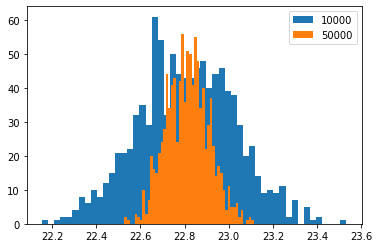

In [181]:
import matplotlib.pyplot as plt
plt.hist(values, bins=50, label='10000')
plt.hist(values2, bins=50, label='50000')
plt.legend()

### 2.11 Class4 MC integration Examples

In [182]:
# generate samples from multivariate normal
mean = np.zeros(2)
corr = 0.8
cov = [[1.0, corr],
      [corr, 1.0]]
samples = np.random.multivariate_normal(mean, cov, size=5)
samples[0:3]

array([[ 1.4199791 ,  0.93178704],
       [ 1.40206368,  0.80365479],
       [-0.78207409, -0.78684648]])

In [183]:
# class exercise on Asian option
# monthly average: t1, t2,... t6 = 30, 60,..., 180
def sim_asian_call_price(S0, K, T, r, q, v, t_array, n):
    price = 0
    # fill in details
    k = len(t_array)
    z = np.random.normal(size=(k,n))
    S_sum = S = S0*np.exp((r-q-0.5*v**2)*(t_array[0]) + v*np.sqrt(t_array[0])*z[0])
    for i in range(1,k):
        dt = t_array[i] - t_array[i-1]
        S = S*np.exp((r-q-0.5*v**2)*dt + v*np.sqrt(dt)*z[i])
        S_sum += S
    S_avg = S_sum / k
    disc_payoffs = np.exp(-r*T)*np.maximum(S_avg - K,0)
    price = np.mean(disc_payoffs)
    return price

In [184]:
S0, K, T, r, q, v = 180, 160, 180/365, 0.02, 0.015, 0.20
t_array = np.linspace(30, 180, 6)/365
n = 10000
sim_asian_call_price(S0, K, T, r, q, v, t_array, n)

20.741433641298464

In [185]:
np.zeros(shape=(5,4))
#np.linspace

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [186]:
np.linspace(2, 10, num=5)

array([ 2.,  4.,  6.,  8., 10.])

### 2.18 Class5 OOP

In [187]:
# class definition
class MyClass(object):
    x = 13 # class attribute ('static', not truly static)
    # constructor
    def __init__(self, y):
        print('__init_ is called', y)
        self.y = y # class attribute
    
    def method1(self, a):
        print('method1 is called by ', a)

In [188]:
# instance of MyClass
c = MyClass(1.2)

__init_ is called 1.2


In [189]:
c.y, c.x, MyClass.x

(1.2, 13, 13)

In [190]:
c.method1('me')

method1 is called by  me


In [191]:
c.x = 10
c.x, MyClass.x

(10, 13)

In [192]:
# encapsulation: private vs public (vs protected)
# private: __xxx
#class MyClass(object):
class MyClass:
    __x = 13 # private class attribute (only accessible within this class)
    x1 = 23
    # constructor
    def __init__(self, y, w=1.0):
        print('__init_ is called', y)
        self.y = y # class attribute
        self.__w = w
        self.__w__ = w + y # private but accessible to public
 
#   def __init__(self):
#        print('__init_ is called')
 
    def method1(self, a):
        print('method1 is called by ', a)
 
    def __method1(self, a): # private method
        print('__method1 is called by ', a)

In [193]:
c1 = MyClass(2,3)

__init_ is called 2


In [194]:
c1.__w__

5

In [195]:
#c1.__method('me') error
c1._MyClass__x

13

In [196]:
a = MyClass(1,4)

__init_ is called 1


In [197]:
a.x1 = 20

In [198]:
b = MyClass(5,6)

__init_ is called 5


In [199]:
b.x1

23

In [200]:
MyClass.x1 = 30

In [201]:
a.x1, b.x1

(20, 30)

In [203]:
#inheritance
class MySubClass(MyClass):
    def __init__(self, y, w, z):
        super().__init__(y, w)
        self.z = z

In [204]:
c2 = MySubClass(1,2,3)

__init_ is called 1


In [205]:
# Example: define classes for different trade types
# base: equity trade position

In [206]:
import datetime as dt
import numpy as np
 
class Market:
    def __init__(self, date, spot_price, vol=0.0, zero_rate=0.0, div_rate=0.0):
        self.date = date
        self.spot_price = spot_price
        self.vol = vol
        self.zero_rate = zero_rate
        self.div_rate = div_rate
        
class Trade:
    def __init__(self, name, side, quantity): # more attributes
        self.name = name
        self.side = side # long: +1, short: -1
        self.quantity = quantity
        
    def value(self, mkt):
        if not isinstance(mkt, Market):
            raise TypeError('Input must be an instance of Market')
        return self.side*self.quantity*mkt.spot_price
    
    def delta(self, mkt):
        if not isinstance(mkt, Market):
            raise TypeError('Input must be an instance of Market')
        return self.side*self.quantity
    
    def scen_values(self, mkt, spot_prices):
        vals = self.side*self.quantity*spot_prices
        return vals

In [ ]:
# class exercise: define a subclass EuropeanCall(Trade) for European call option on e

In [207]:
from scipy import stats
 
# from class notes 3
def BS_option_price(S0, K, T, r, q, v):
    # can add checks on inputs
    d1 = (np.log(S0/K) + (r - q + v**2 /2)*T) / (v*np.sqrt(T))
    d2 = d1 - v*np.sqrt(T)
    price = S0*np.exp(-q*T)*stats.norm.cdf(d1) - K*np.exp(-r*T)*stats.norm.cdf(d2)
    return price

In [216]:
class EuropeanCall(Trade):
    def __init__(self, name, side, quantity, strike, expiry_date):
        Trade.__init__(self, name, side, quantity)
        self.strike = strike
        self.expiry_date = expiry_date
    def value(self, mkt):
        t = (self.expiry_date - mkt.date).days / 365
        val = BS_option_price(mkt.spot_price, self.strike, t,mkt.zero_rate, mkt.div_rate, mkt.vol) 
        return self.side*self.quantity*val
    def delta(self, mkt):
        if not isinstance(mkt, Market):
            raise TypeError('Input must be an instance of Market')
        t = (self.expiry_date - mkt.date).days / 365
        d1 = (np.log(mkt.spot_price/self.strike) + 
              (mkt.zero_rate - mkt.div_rate + mkt.vol**2 /2)*t) / (mkt.vol*np.sqrt(t))
        return self.side*self.quantity*stats.norm.cdf(d1)
    def scen_values(self, mkt, spot_prices):
        t = (self.expiry_date - mkt.date).days / 365
        vals = BS_option_price(spot_prices, self.strike, t,
                       mkt.zero_rate, mkt.div_rate, mkt.vol)
        return self.side*self.quantity*vals

### 2.25 Class6 

In [217]:
# plotting 2D, 3D
# pandas:
# - series, dataframe
# - data manipulation
# - data grouping/aggregation/concatenating dataframes
# - basic statistics, moving statistics (running average)
# - use case: list of FX transactions

In [218]:
import numpy as np
import matplotlib.pyplot as plt

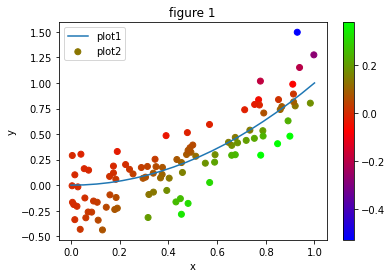

In [219]:
fig = plt.figure()
# line plot
x = np.linspace(0, 1, 20)
y = x**2
plt.plot(x, y, label='plot1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('figure 1')
 
# scatter plot
n = 100
x1 = np.random.rand(n)
x2 = x1**2 + 0.2* np.random.normal(size=n)
x3 = x1**2 - x1*x2
plt.scatter(x1, x2, c=x3, cmap='brg', label='plot2')
plt.colorbar()
plt.legend()

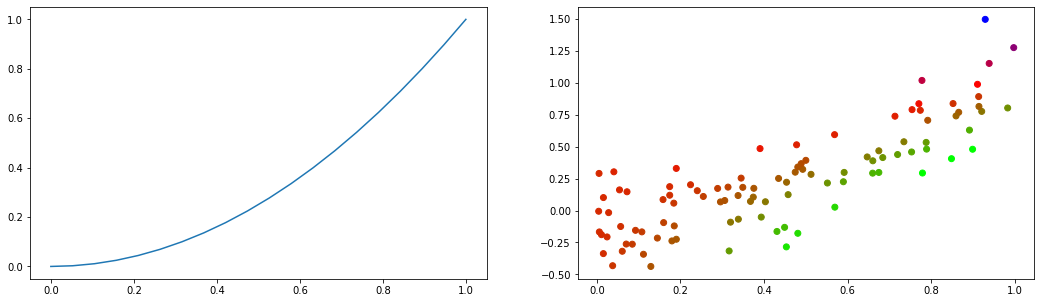

In [220]:
fig2 = plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
plt.plot(x, y, label='plot1')
plt.subplot(1, 2, 2)
plt.scatter(x1, x2, c=x3, cmap='brg', label='plot2')

In [221]:
x = np.linspace(-1, 1, 3) # [-1, 0, 1]
y = np.linspace(11, 14, 4) # [11, 12, 13, 14]
X, Y = np.meshgrid(x, y) # returns two 2D grids
X

array([[-1.,  0.,  1.],
       [-1.,  0.,  1.],
       [-1.,  0.,  1.],
       [-1.,  0.,  1.]])

In [222]:
Y

array([[11., 11., 11.],
       [12., 12., 12.],
       [13., 13., 13.],
       [14., 14., 14.]])

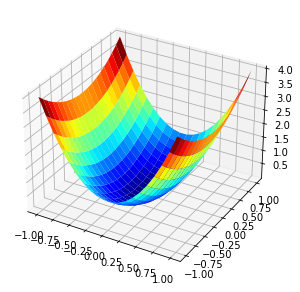

In [223]:
fig3 = plt.figure(figsize=(18,5))
ax = fig3.add_subplot(projection='3d')
x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(x, y)
Z = 3*X**2 + Y**2
ax.plot_surface(X, Y, Z, cmap='jet')

In [224]:
fig.savefig('plot1.png')

In [225]:
import pandas as pd

In [226]:
# pandas - built on top of numpy
# Series: 1D array
a = np.arange(10, 15)
s = pd.Series(a, name='my series')
s.index = pd.date_range('2022/02/25', periods=5)
s #, s.name

2022-02-25    10
2022-02-26    11
2022-02-27    12
2022-02-28    13
2022-03-01    14
Freq: D, Name: my series, dtype: int64

In [227]:
# access data in seroes
# numpy: s[0]
s.loc['2022-02-27'], s.iloc[2]

(12, 12)

In [228]:
# slicing by year or month
s.loc['2022-02']

2022-02-25    10
2022-02-26    11
2022-02-27    12
2022-02-28    13
Freq: D, Name: my series, dtype: int64

In [229]:
# dataframe - 2D array
row_labels = ['a', 'b', 'c']
col_labels = ['Open', 'Close']
x = np.random.randint(10, 20, size=(3, 2))
df = pd.DataFrame(data=x, index=row_labels, columns=col_labels)
df

,Open,Close
a,13,15
b,14,19
c,12,11


In [230]:
# data selection by label, position
df.loc['c', 'Close'], df.iloc[1,1]

(11, 19)

In [231]:
# select column
df['Close']

a    15
b    19
c    11
Name: Close, dtype: int64

In [232]:
# select row
df.loc['b']

Open     14
Close    19
Name: b, dtype: int64

In [233]:
# derive data from existing data
df['change'] = df['Close'] - df['Open']
df

,Open,Close,change
a,13,15,2
b,14,19,5
c,12,11,-1


In [234]:
# insert new rows
df.loc['a+b'] = df.loc['a'] + df.loc['b']
df

,Open,Close,change
a,13,15,2
b,14,19,5
c,12,11,-1
a+b,27,34,7


In [235]:
# drop rows or columns
df1 = df.drop('a+b') #, axis=0) # returns a new dataframe
df1

,Open,Close,change
a,13,15,2
b,14,19,5
c,12,11,-1


In [237]:
# insert column: df.insert
df

,Open,Close,change
a,13,15,2
b,14,19,5
c,12,11,-1
a+b,27,34,7


In [238]:
# query by criteria
df.query('change > 0')
df.query('Open > 10 and change/Open > 0.1')

,Open,Close,change
a,13,15,2
b,14,19,5
a+b,27,34,7


In [239]:
# basic statistic
df.mean()
df.describe()

,Open,Close,change
count,4.000000,4.000000,4.00
mean,16.500000,19.750000,3.25
std,7.047458,10.045729,3.50
min,12.000000,11.000000,-1.00
25%,12.750000,14.000000,1.25
50%,13.500000,17.000000,3.50
75%,17.250000,22.750000,5.50
max,27.000000,34.000000,7.00


In [240]:
df.quantile(0.9)

Open      23.1
Close     29.5
change     6.4
Name: 0.9, dtype: float64

In [241]:
# fill missing values
df.loc['c', 'Close'] = np.nan
df.loc['a', 'Open'] = np.nan
df2 = df.fillna(method='ffill') # forward fill, back fill, # return a new dataframe
df2 = df2.fillna(method='bfill')
df2

,Open,Close,change
a,14.0,15.0,2
b,14.0,19.0,5
c,12.0,19.0,-1
a+b,27.0,34.0,7


In [243]:
fileloc = '/Users/lanjenny/Downloads/fx_trades.csv'
d = pd.read_csv(fileloc)

In [244]:
d.head(3) # tail()

,TradeID,Type,Date,Ccy,Amt
0,FX200171,Spot,2/16/2021,EUR,1000000
1,FX200171,Spot,2/16/2021,USD,-1100000
2,FX200172,Spot,2/16/2021,GBP,-1000000


In [245]:
g1 = d.groupby(['Ccy']) # holder of info about how to do grouping, reference to orig

In [246]:
g1.get_group('EUR')

,TradeID,Type,Date,Ccy,Amt
0,FX200171,Spot,2/16/2021,EUR,1000000
3,FX200172,Spot,2/16/2021,EUR,1180000
8,FX200175,NDF,4/16/2021,EUR,-200000
15,FX200178,Forward,5/16/2021,EUR,-1170000
16,FX200179,Forward,5/16/2021,EUR,-1000000


In [247]:
g1.groups

{'BRL': [7, 9], 'CAD': [11], 'EUR': [0, 3, 8, 15, 16], 'GBP': [2, 4, 12, 14], 'USD': [1, 5, 6, 10, 13, 17]}

In [248]:
g1.sum()

,Amt
Ccy,
BRL,-349000
CAD,6750000
EUR,-190000
GBP,0
USD,-4660000


In [249]:
g2 = d.groupby(['Ccy','Date'])
s = g2.sum() # aggregation of cashflows by ccy by date, return a dataframe

In [250]:
s.loc['EUR','5/16/2021']

Amt   -2170000
Name: (EUR, 5/16/2021), dtype: int64

In [251]:
s.to_csv('summed.csv')

In [252]:
g2.groups

{('BRL', '4/16/2021'): [7, 9], ('CAD', '5/16/2021'): [11], ('EUR', '2/16/2021'): [0, 3], ('EUR', '4/16/2021'): [8], ('EUR', '5/16/2021'): [15, 16], ('GBP', '2/16/2021'): [2], ('GBP', '3/16/2021'): [4], ('GBP', '5/16/2021'): [12, 14], ('USD', '2/16/2021'): [1], ('USD', '3/16/2021'): [5], ('USD', '4/16/2021'): [6], ('USD', '5/16/2021'): [10, 13, 17]}

### 3.4 Class7 Volatility forcast

In [2]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web #这是啥packages?

In [4]:
d = web.DataReader(name='GOOGL',data_source='yahoo', 
               start = '2021-06-04',
               end = '2022-03-04')

In [5]:
d.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-02,2705.250000,2661.429932,2692.560059,2691.429932,1176000,2691.429932
2022-03-03,2728.790039,2660.510010,2720.199951,2677.989990,1230200,2677.989990
2022-03-04,2677.030029,2606.750000,2658.550049,2638.129883,1521500,2638.129883


<AxesSubplot:xlabel='Date'>

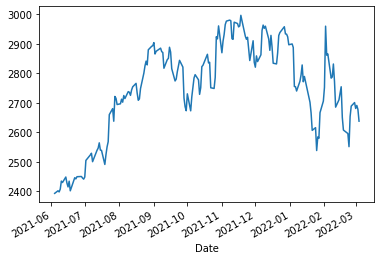

In [6]:
d.Close.plot()

In [7]:
d['Adj Close']

Date
2021-06-04    2393.570068
2021-06-07    2402.300049
2021-06-08    2398.439941
2021-06-09    2407.939941
2021-06-10    2435.129883
                 ...     
2022-02-28    2701.139893
2022-03-01    2681.229980
2022-03-02    2691.429932
2022-03-03    2677.989990
2022-03-04    2638.129883
Name: Adj Close, Length: 190, dtype: float64

In [8]:
# log price return = ln(P(t)) - ln(P(t-1))
d['Adj Close'].shift(1)

Date
2021-06-04            NaN
2021-06-07    2393.570068
2021-06-08    2402.300049
2021-06-09    2398.439941
2021-06-10    2407.939941
                 ...     
2022-02-28    2689.189941
2022-03-01    2701.139893
2022-03-02    2681.229980
2022-03-03    2691.429932
2022-03-04    2677.989990
Name: Adj Close, Length: 190, dtype: float64

In [9]:
r = np.log(d['Adj Close']) -np.log(d['Adj Close'].shift(1))

In [10]:
r

Date
2021-06-04         NaN
2021-06-07    0.003641
2021-06-08   -0.001608
2021-06-09    0.003953
2021-06-10    0.011229
                ...   
2022-02-28    0.004434
2022-03-01   -0.007398
2022-03-02    0.003797
2022-03-03   -0.005006
2022-03-04   -0.014996
Name: Adj Close, Length: 190, dtype: float64

In [11]:
#SMA over 3 days
r_sma = r.rolling(window=3) # returns a Rolling object (used to compute mean and std)
type(r_sma)

pandas.core.window.rolling.Rolling

In [12]:
r_sma.mean() # SMA mean of log price return r

Date
2021-06-04         NaN
2021-06-07         NaN
2021-06-08         NaN
2021-06-09    0.001995
2021-06-10    0.004524
                ...   
2022-02-28    0.018964
2022-03-01    0.003425
2022-03-02    0.000278
2022-03-03   -0.002869
2022-03-04   -0.005402
Name: Adj Close, Length: 190, dtype: float64

In [14]:
# EWMA
r_ewm = r.ewm(alpha=0.06, # alpha = 1- lamda=0.94 # returns a ewm object
             adjust = True, # Ture: weighted sum formula, False: recursive formula
             min_periods=3)

In [15]:
type (r_ewm)

pandas.core.window.ewm.ExponentialMovingWindow

In [16]:
r_ewm.mean()

Date
2021-06-04         NaN
2021-06-07         NaN
2021-06-08         NaN
2021-06-09    0.002004
2021-06-10    0.004528
                ...   
2022-02-28   -0.000467
2022-03-01   -0.000883
2022-03-02   -0.000602
2022-03-03   -0.000866
2022-03-04   -0.001714
Name: Adj Close, Length: 190, dtype: float64

<AxesSubplot:xlabel='Date'>

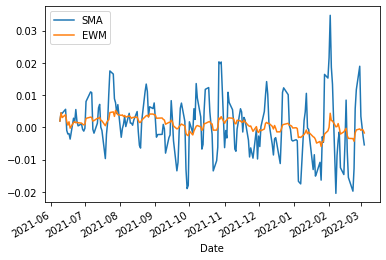

In [17]:
sma_r = r_sma.mean()
ewm_r = r_ewm.mean()
sma_r.plot (label = 'SMA', legend = True)
ewm_r.plot (label = 'EWM', legend = True)

<AxesSubplot:xlabel='Date'>

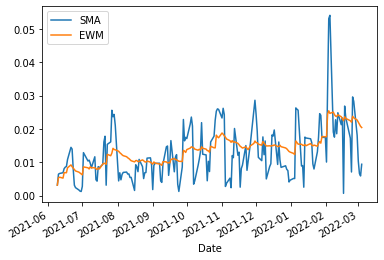

In [18]:
sma_vol = r_sma.std()
ewm_vol = r_ewm.std()
sma_vol.plot (label = 'SMA', legend = True)
ewm_vol.plot (label = 'EWM', legend = True)

In [ ]:
# class exercise: download the price series for FB and AAPL
# and compare their EWMA vol estimates (past half year or longer peroid)

In [19]:
d= web.DataReader(name='GOOGL', data_source='yahoo',
                 start = '2021-03-04',
                 end = '2022-03-04')

In [20]:
d1 = web.DataReader(name='FB', data_source='yahoo',
                 start = '2021-03-04',
                 end = '2022-03-04')

In [21]:
d2 = web.DataReader(name='AAPL', data_source='yahoo',
                 start = '2021-03-04',
                 end = '2022-03-04')

In [22]:
r = np.log(d['Adj Close']) - np.log(d['Adj Close'].shift(1))
r1 = np.log(d1['Adj Close']) - np.log(d1['Adj Close'].shift(1))
r2 = np.log(d2['Adj Close']) - np.log(d2['Adj Close'].shift(1))

<AxesSubplot:xlabel='Date'>

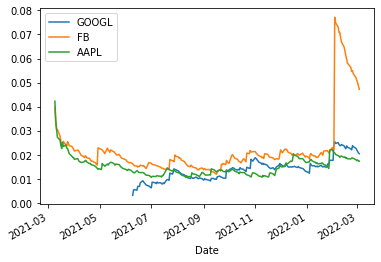

In [23]:
r_ewm = r.ewm (alpha = 0.06, adjust = True, min_periods=3)
r1_ewm = r1.ewm (alpha = 0.06, adjust = True, min_periods=3)
r2_ewm = r2.ewm (alpha = 0.06, adjust = True, min_periods=3)

ewm_voL = r_ewm.std()
ewm_vol1 = r1_ewm.std()
ewm_vol2 = r2_ewm.std()

ewm_vol.plot(label="GOOGL", legend =True)
ewm_vol1.plot(label="FB", legend =True)
ewm_vol2.plot(label="AAPL", legend =True)

<AxesSubplot:xlabel='Date'>

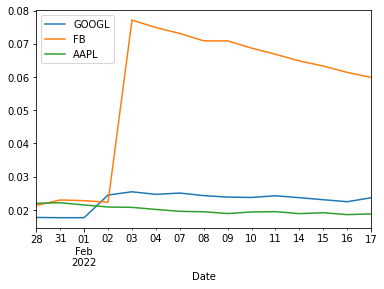

In [24]:
ewm_vol[-25:-10].plot(label='GOOGL',legend=True)
ewm_vol1[-25:-10].plot(label='FB',legend=True)
ewm_vol2[-25:-10].plot(label='AAPL',legend=True)

In [25]:
# d1['Adj Close'].tail()
r1[-25:-15]

Date
2022-01-28    0.023712
2022-01-31    0.037567
2022-02-01    0.018158
2022-02-02    0.012461
2022-02-03   -0.306391
2022-02-04   -0.002822
2022-02-07   -0.052739
2022-02-08   -0.021255
2022-02-09    0.052292
2022-02-10   -0.017085
Name: Adj Close, dtype: float64

### 3.25 Class8 VaR

### 4.1 Class9 Machine Learning Basics

### 4.8 Class10 Support Vector Machines (SVM)

In [26]:
import sklearn
import numpy as np
import pandas as pd

In [27]:
from sklearn import datasets

In [28]:
housing = datasets.fetch_california_housing()

In [29]:
housing.feature_names, housing.target_names

(['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 ['MedHouseVal'])

In [30]:
housing.data.shape, type(housing.data)

((20640, 8), numpy.ndarray)

In [33]:
import scipy.stats as stats

def BS_option_value (S0, K, T, r, q, v):
    d1 = (np.log(S0/K)+(r-q+0.5*v**2)*T)/ (v*np.sqrt(T))
    d2 = d1 - v*np.sqrt(T)
    price = S0 * np.exp (-q*T)*stats.norm.cdf(d1) - K * np.exp (-r*T) * stats.norm.cdf(d2)
    return price

In [34]:
S0, K, T, r, q ,v = 180, 180, 0.5, 0.001, 0.015, 0.20
BS_option_value (S0, K, T, r, q, v)

9.49138210449216

In [35]:
N = 1000
np.random.seed(1)  # 啥意思? seed?
S0 = 180 * np.random.uniform (0.6, 1.4, size = N)
v = np.random.uniform (0.05, 0.40, size = N)
dummy = np.random.uniform (-1.0,1.0, size =N)
p = BS_option_value (S0, K,T, r,q, v)

In [36]:
p.shape, S0 [:3], p[:3]

((1000,),
 array([168.05116868, 211.72672706, 108.01646997]),
 array([ 3.10578408, 38.47453516,  0.10008764]))

In [37]:
S0 = S0.reshape (N,1)
v = v.reshape (N,1)
dummy = dummy.reshape (N,1)
x= np.concatenate ((S0, v, dummy), axis =1)
# reshape
# axis =1 什么意思

In [38]:
x.shape

(1000, 3)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, p, test_size = 0.2)

In [40]:
x_train.shape, x_train[0]

((800, 3), array([2.04297519e+02, 1.52309817e-01, 8.02133987e-01]))

In [41]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
scaler.fit(x_train) # prepare the necessary info eg. stdev of each featre
X_train = scaler.transform(x_train) # convert feature value to Z-score
X_test = scaler.transform(x_test)

In [44]:
X_train[0]

array([ 0.58034896, -0.77642021,  1.51231859])

In [45]:
from sklearn import svm

In [46]:
model = svm.SVR (C=1.0, kernel = 'rbf', gamma =1.0)

In [47]:
model.fit (X_train, y_train)

SVR(gamma=1.0)

In [49]:
y_predict = model.predict (X_test)
y_predict[:3], y_test[:3]

(array([37.32773469,  3.45731164, 35.56397525]),
 array([6.70392734e+01, 1.73866746e-02, 4.48709069e+01]))

In [50]:
model.score (X_test, y_test) # score method是什么意思

0.8922321220917604

In [52]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score (model, X_train, y_train, cv=5)

In [53]:
cv_scores.mean()

0.8641731991701649

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
parm_grid = [
    {'C':[1,10,100], 'gamma':[0.01,0.1,1,10]}
]
grid_search = GridSearchCV (model, parm_grid, cv=5)
grid_search.fit (X_train, y_train)# do the real job

GridSearchCV(cv=5, estimator=SVR(gamma=1.0),
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}])

In [57]:
best_model = grid_search.best_estimator_

In [58]:
grid_search.best_params_

{'C': 100, 'gamma': 1}

### 4.15 Class11 Tree-based models (Random forcast)

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn import tree

In [60]:
n = 1000
X, y = make_classification (n_samples= n, n_features = 2, n_redundant = 0,
                           n_clusters_per_class = 1 , n_classes =3, 
                           random_state = 0)

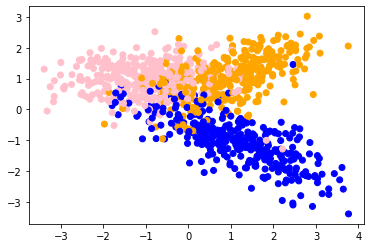

In [62]:
colors = np.array(['blue','orange','pink'])
plt. scatter (X[:,0], X[:,1], color =colors[y])

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state =0)

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier (max_leaf_nodes = 10 )# hyperparameters

In [65]:
dt.fit( X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

In [66]:
dt.score (X_test, y_test)

0.87

In [69]:
y_pred = dt. predict (X_test)
y_pred[0]


2

In [68]:
# class probability distribution 
pred_probs = dt. predict_proba (X_test)
pred_probs[0]


array([0.03488372, 0.02325581, 0.94186047])

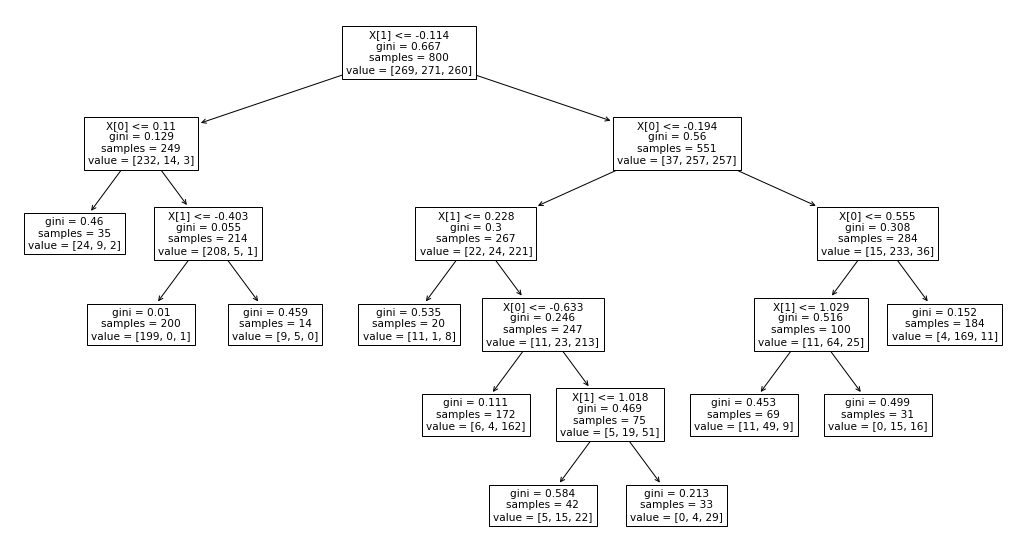

In [70]:
fig = plt.figure(figsize = (18, 10))
tree.plot_tree (dt)
plt.show()


In [71]:
# extract tree nodes and info from here
tr = dt.tree_

In [72]:
# feature index at the root node 0
tr.feature [0], tr.threshold[0], tr.impurity [0], tr.value [0]

(1, -0.11396245658397675, 0.6665593750000001, array([[269., 271., 260.]]))

In [73]:
left_node_idx = tr.children_left[0]

In [74]:
tr.feature [ left_node_idx]
# this value refers to the feature index for splitting

0

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features =1, n_estimators =5 , random_state = 10)

In [76]:
rf. fit(X_train, y_train)

RandomForestClassifier(max_features=1, n_estimators=5, random_state=10)

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_features': [1,2],
    'n_estimators': np.arange(1,40)}
]
gs = GridSearchCV (rf, param_grid, cv=5)

In [80]:
gs.fit (X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features=1, n_estimators=5,
                                              random_state=10),
             param_grid=[{'max_features': [1, 2],
                          'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])}])

In [81]:
gs.best_params_

{'max_features': 1, 'n_estimators': 19}

In [82]:
# mean cv score
mean_cv_scores = gs.cv_results_['mean_test_score'].reshape(2,39)

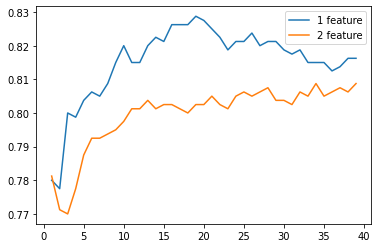

In [83]:
plt.plot(np.arange(1,40), mean_cv_scores[0], label = '1 feature')
plt.plot(np.arange(1,40), mean_cv_scores[1], label = '2 feature')
plt.legend()

### 4.22 Class12 Neural Network

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [88]:
n= 1000
X, y = make_classification (n_samples = n, n_features =2, 
                          n_redundant =0 , n_informative = 2,
                          n_clusters_per_class =1, n_classes =3,
                          random_state =0 )

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size =0.2, random_state= 0) #为什么random state =0?

In [90]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier (hidden_layer_sizes =(8),
                    max_iter = 1000,
                    solver = 'sgd', #'adam'
                    batch_size = 200,
                    early_stopping = True)
mlp.fit (X_train, y_train)

MLPClassifier(batch_size=200, early_stopping=True, hidden_layer_sizes=8,
              max_iter=1000, solver='sgd')

In [91]:
mlp.score (X_test, y_test)

0.32

In [92]:
mlp. n_iter_

19

In [93]:
mlp.loss_

1.2134998349554966

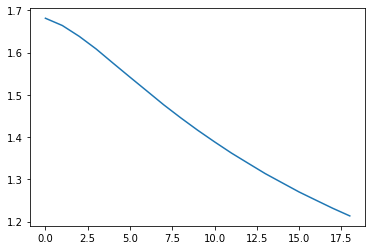

In [94]:
plt.plot(mlp.loss_curve_)

### 4.29 Class13 Final Remarks